# Caching Experiement

In [124]:
from memory import Memory, CyclicCache, LRUCache, RandomCache
import random


This module will be used so that I dont need to generate the same tests over and over again

In [125]:
def getTests():
    tests = []
    test20 = []
    for i in range(20):
        test20.append(random.randint(0,30))
    test40 = []
    for i in range(40):
        test40.append(random.randint(0,30))
    test60 = []
    for i in range(60):
        test60.append(random.randint(0,30))
    test80 = []
    for i in range(80):
        test80.append(random.randint(0,30))
    test100 = []
    for i in range(100):
        test100.append(random.randint(0,30))
    test1000 = []
    for i in range(1000):
        test1000.append(random.randint(0,30))
    tests.append(test20)
    tests.append(test40)
    tests.append(test60)
    tests.append(test80)
    tests.append(test100)
    tests.append(test1000)
    return tests



I will use the same tests against each cache to fairly tests them

In [126]:
tests = getTests()

This function will save me writing the same tests for each new test I run

In [127]:
def testCache(cType,tests, cSize = 4):
    tests = getTests()
    results = []
    
    for testNum in range(len(tests)):
        if(cType == "Cyclic"):
            cache = CyclicCache(cSize)
        elif(cType == "LRU"):
            cache = LRUCache(cSize)
        elif(cType == "Random"):
            cache = RandomCache(cSize)
        else:
            cache = Memory()
        for testData in range(len(tests[testNum])):
            cache.lookup(tests[testNum][testData])
        results.append(cache.get_hit_count())
    return results

This will give me the percentage hitrate for each caching strategy 

In [128]:
def getPercentages(list1):
    newList = [0,0,0,0,0,0]
    newList[0] = list1[0]/20
    newList[1] = list1[1]/40
    newList[2] = list1[2]/60
    newList[3] = list1[3]/80
    newList[4] = list1[4]/100
    newList[5] = list1[5]/1000
    return newList

I can now perform tests

# Cyclic tests

Testing Cyclic cache with a standard cache size

In [129]:
cyclicTest4 = testCache("Cyclic",tests, 4)

In [130]:
cyclicTest4

[16, 32, 54, 69, 87, 857]

In [131]:
cyclicTest8 = testCache("Cyclic",tests, 8)

In [132]:
cyclicTest8

[19, 33, 47, 66, 74, 737]

In [133]:
cyclicTest16 = testCache("Cyclic",tests, 16)

In [134]:
cyclicTest16

[14, 29, 40, 46, 54, 489]

# LRU tests

In [135]:
LRUTest4 = testCache("LRU",tests,4)

In [136]:
LRUTest4

[17, 30, 54, 73, 92, 885]

In [137]:
LRUTest8 = testCache("LRU",tests,8)

In [138]:
LRUTest8

[17, 36, 43, 67, 78, 750]

In [139]:
LRUTest16 = testCache("LRU",tests,16)

In [140]:
LRUTest16

[16, 28, 30, 46, 49, 491]

# Random tests

In [141]:
randomTest4 = testCache("Random",tests,4)

In [142]:
randomTest4

[20, 39, 51, 74, 91, 861]

In [143]:
randomTest8 = testCache("Random",tests,8)

In [144]:
randomTest8

[17, 36, 49, 64, 68, 714]

In [145]:
randomTest16 = testCache("Random",tests,16)

In [146]:
randomTest16

[13, 21, 33, 45, 46, 489]

# Visualising the data

In [147]:

import matplotlib.pyplot as plt

In [148]:
colNames = ["20 Items C",
     "40 Items C",
     "60 Items C",
     "80 Items C",
     "100 Items C",
     "20 Items L",
     "40 Items L",
     "60 Items L",
     "80 Items L",
     "100 Items L",
     "20 Items R",
     "40 Items R",
     "60 Items R",
     "80 Items R",
     "100 Items R"]

First I will compare the tests where the cache size is 4. For now I will exclude the 6 test and compare them later, as the values are substantially larger. In the graph below C denotes the cyclic test, L denotes the LRU tests and R denotes the Random tests

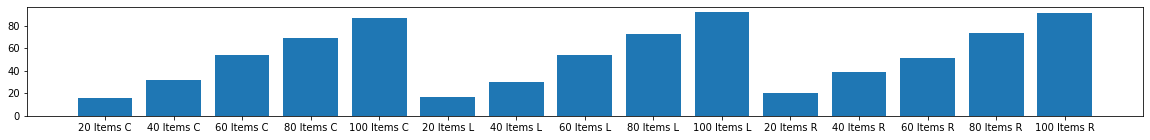

In [149]:
fig = plt.figure(figsize=(20, 2)).add_subplot().bar(colNames,cyclicTest4[:5]+LRUTest4[:5]+randomTest4[:5])

For Clarity I will also show all the raw data below

In [150]:
print(cyclicTest4[:5])
print(LRUTest4[:5])
print(randomTest4[:5])

[16, 32, 54, 69, 87]
[17, 30, 54, 73, 92]
[20, 39, 51, 74, 91]


The data mirrors eachother quite closely and it is hard to tell which is the best here. However the cyclic test has the most number of low results

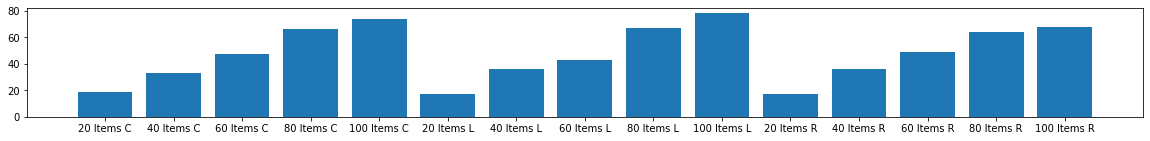

In [151]:
fig = plt.figure(figsize=(20, 2)).add_subplot().bar(colNames,cyclicTest8[:5]+LRUTest8[:5]+randomTest8[:5])

In [152]:
print(cyclicTest8[:5])
print(LRUTest8[:5])
print(randomTest8[:5])

[19, 33, 47, 66, 74]
[17, 36, 43, 67, 78]
[17, 36, 49, 64, 68]


In [155]:
(74+78+68)/(87+92+91)

0.8148148148148148

As shown above, doubling the cache size has reduced the cache hits but roughly 20%

Once again the methods mirror one another, with the random test with the most number of low results

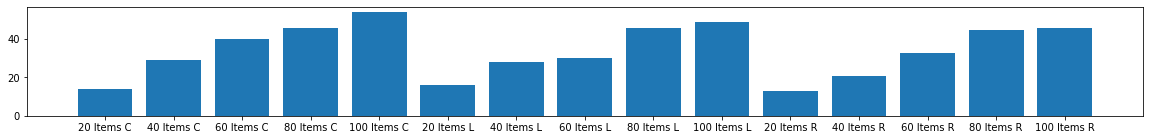

In [154]:
fig = plt.figure(figsize=(20, 2)).add_subplot().bar(colNames,cyclicTest16[:5]+LRUTest16[:5]+randomTest16[:5])

In [156]:
print(cyclicTest16[:5])
print(LRUTest16[:5])
print(randomTest16[:5])

[14, 29, 40, 46, 54]
[16, 28, 30, 46, 49]
[13, 21, 33, 45, 46]


In [157]:
(54+49+46)/(74+78+68)

0.6772727272727272

The double in cache size has led to a 30% reduction in cache hits

In this test the clear winner is the random test with 4 of the lowest values

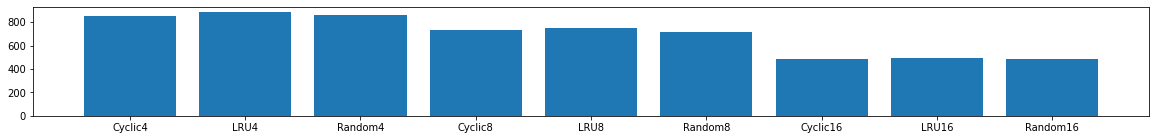

In [159]:
fig = plt.figure(figsize=(20, 2)).add_subplot().bar(["Cyclic4", 
                                                     "LRU4", 
                                                     "Random4",
                                                     "Cyclic8", 
                                                     "LRU8", 
                                                     "Random8",
                                                     "Cyclic16", 
                                                     "LRU16", 
                                                     "Random16"],[cyclicTest4[5],
                                                                  LRUTest4[5],
                                                                 randomTest4[5],
                                                                  cyclicTest8[5],
                                                                  LRUTest8[5],
                                                                 randomTest8[5],
                                                                  cyclicTest16[5],
                                                                  LRUTest16[5],
                                                                 randomTest16[5]])

In [162]:
[cyclicTest4[5],
LRUTest4[5],
randomTest4[5]]

[857, 885, 861]

In [163]:
[cyclicTest8[5],
LRUTest8[5],
randomTest8[5]]

[737, 750, 714]

In [164]:
[cyclicTest16[5],
LRUTest16[5],
randomTest16[5]]

[489, 491, 489]

The tests above show the result of applying each caching strategy on 100 items.

Once again the results are quite similar, however the cyclic test has the most low values

# Conclusions

In conclusion, the caching results clearly reduced the number of cache hits in comparison to the standard memory implementation.
However, the results for each caching strategy were surprisingly similar throughout the experiment. My results suggest that the cyclic and random strategy are the better ones, however the results were so close that its possible that running the same tests again would reveal different results.

The results show that there is not much difference between the behaviour of each strategy. If there was, there would be a much clearer trend showing which strategy was better

As for how often a lookup will result in a memory access, this will depend on several factors. For example, increasing the cache size will reduce the memory accesses, as expected. 